In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import collections
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pickle
from tqdm import tqdm
from pathlib import Path
import contextily as ctx
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [2]:
### SET HYPERPARAMETERS ###
city = "nyc"
t_window = 210  # Training window in days
k_days = 7  # Epoch length in days
threshold = 100  # Performance degradation threshold (adjust as needed)
max_simulation_days = 104  # Maximum number of simulation days
topK = 20
algorithm1 = 'ItemKNN'
algorithm2 = 'MultiVAE'
version = "full"
seed = 501

### ------------------- ###


In [3]:
basedir = pathlib.Path().cwd().parent

# Define base directory up to the version level
version_dir = basedir / 'out' / 'experiments' / version /str(seed)

simulated_temporal_colocation_net_1 = {}
simulated_temporal_colocation_net_2 = {}


# Define the colocation network simulation path inside each seed folder
colocation_network_1_simulated_dir = (
    version_dir / 'colocationnetworks' /
    f'city_{city}__train_{t_window}__step_{k_days}__max_{max_simulation_days}__topK_{topK}__alg_{algorithm1}'
)


for file_path in tqdm(colocation_network_1_simulated_dir.iterdir()):
    if file_path.name.endswith(".gpickle"):
        rec_prob = float(file_path.name.split("_")[1])
        epoch = int(file_path.name.split("_")[3].split(".")[0])

        # Initialize dictionary structure
        if seed not in simulated_temporal_colocation_net_1:
            simulated_temporal_colocation_net_1[seed] = {}
        if rec_prob not in simulated_temporal_colocation_net_1[seed]:
            simulated_temporal_colocation_net_1[seed][rec_prob] = {}

        # Load the graph
        with open(file_path, "rb") as f:
            simulated_temporal_colocation_net_1[seed][rec_prob][epoch] = pickle.load(f)

# Define the colocation network simulation path inside each seed folder
colocation_network_2_simulated_dir = (
    version_dir / 'colocationnetworks' /
    f'city_{city}__train_{t_window}__step_{k_days}__max_{max_simulation_days}__topK_{topK}__alg_{algorithm2}'
)
for file_path in tqdm(colocation_network_2_simulated_dir.iterdir()):
    if file_path.name.endswith(".gpickle"):
        rec_prob = float(file_path.name.split("_")[1])
        epoch = int(file_path.name.split("_")[3].split(".")[0])

        # Initialize dictionary structure
        if seed not in simulated_temporal_colocation_net_2:
            simulated_temporal_colocation_net_2[seed] = {}
        if rec_prob not in simulated_temporal_colocation_net_2[seed]:
            simulated_temporal_colocation_net_2[seed][rec_prob] = {}

        # Load the graph
        with open(file_path, "rb") as f:
            simulated_temporal_colocation_net_2[seed][rec_prob][epoch] = pickle.load(f)


105it [00:00, 7779.03it/s]
105it [00:00, 908.32it/s]


In [4]:
def collapse_temporal_networks(networks):
    networks = list(networks.values())
    G = networks[0].copy()
    for i in range(1, len(networks)):
        G = nx.compose(G, networks[i])
    return G

# Define probability values in a list for easy reference
probabilities = [0.0, 1.0]

# Create a dictionary to store all networks
colocation_nets_1 = {p: simulated_temporal_colocation_net_1[seed][p] for p in probabilities}

agg_networks_dict_1 = {
    0.0: collapse_temporal_networks(colocation_nets_1[0.0]),
    1.0: collapse_temporal_networks(colocation_nets_1[1.0])
}

# Create a dictionary to store all networks
colocation_nets_2 = {p: simulated_temporal_colocation_net_2[seed][p] for p in probabilities}
agg_networks_dict_2 = {
    0.0: collapse_temporal_networks(colocation_nets_2[0.0]),
    1.0: collapse_temporal_networks(colocation_nets_2[1.0])
}

In [19]:
sorted(agg_networks_dict_2[1].nodes())

['1',
 '10',
 '100',
 '1001',
 '1002',
 '1003',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1021',
 '1022',
 '1023',
 '1024',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1031',
 '1033',
 '1034',
 '1037',
 '1039',
 '104',
 '1040',
 '1042',
 '1043',
 '1045',
 '1047',
 '1048',
 '1049',
 '105',
 '1050',
 '1052',
 '1053',
 '1054',
 '1056',
 '1057',
 '1058',
 '1059',
 '1060',
 '1061',
 '1064',
 '1065',
 '1067',
 '1068',
 '1069',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '1080',
 '1083',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',

In [20]:
sorted(agg_networks_dict_1[1].nodes())

['100',
 '1001',
 '1002',
 '1003',
 '1007',
 '1009',
 '101',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1021',
 '1022',
 '1023',
 '1024',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1031',
 '1033',
 '1034',
 '1036',
 '1037',
 '1039',
 '104',
 '1040',
 '1042',
 '1043',
 '1045',
 '1047',
 '1049',
 '105',
 '1050',
 '1053',
 '1054',
 '1056',
 '1057',
 '1058',
 '1059',
 '1061',
 '1065',
 '1067',
 '1068',
 '1069',
 '107',
 '1070',
 '1072',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1083',
 '11',
 '110',
 '112',
 '113',
 '114',
 '115',
 '119',
 '12',
 '120',
 '122',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '14',
 '140',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '169',
 '17',
 '170',
 '171',
 '174',
 '175',
 

In [21]:
def compute_degree_distribution(G):
    # Get degrees
    degrees = [d[1] for d in G.degree()]
    # Count frequency of each degree
    degree_count = collections.Counter(degrees)
    
    # Sort by degree
    x = sorted(degree_count.keys())
    y = [degree_count[k] / float(len(degrees)) for k in x]  # Normalized frequency
    
    return x, y

# Store all distribution data to find global min/max for both axes
all_distributions_1 = []
all_distributions_2 = []

# Debug information
for i, AggG in agg_networks_dict_1.items():
    x, y = compute_degree_distribution(AggG)
    print(len(x), len(y))
    all_distributions_1.append((x, y))
for i, AggG in agg_networks_dict_2.items():
    x, y = compute_degree_distribution(AggG)
    print(len(x), len(y))
    all_distributions_2.append((x, y))


32 32
27 27
32 32
307 307


In [6]:
from collections import defaultdict
from pathlib import Path
from tqdm.notebook import tqdm
ps = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
new_columns = ['uid', 'lat', 'lon', 'venueID', 'venue_descr', 'time', 'city_name', 'First_Category', 'Second_Category', 'step', 'epoch', 'city', 'simulation_state']
#trajectories_dict is a dictionary in which the first level key is the probability p and the second level key is the algorithm. Then it stores the trajectories dataframe
trajectories_dict_1 = defaultdict(lambda: defaultdict())
trajectories_dict_2 = defaultdict(lambda: defaultdict())

for p in tqdm(ps):
        
    experiment_dir = f"../data/processed/experiments/{version}/{seed}/city_{city}__train_{t_window}__step_{k_days}__max_{max_simulation_days}__topK_{topK}__alg_{algorithm1}__recProb_{p}"
    merged_user_histories = pd.DataFrame()

    for user_fname in Path(experiment_dir).glob('user_histories/*.csv'):
        user_id = user_fname.stem.split('_')[0]
        user_history = pd.read_csv(user_fname, index_col=0)
        if 'simulation_state' not in user_history.columns:
            #print('skipping userid', user_id)
            continue
        user_history.columns = new_columns
        #keep only the rows that have simulation_state not Nan
        user_history = user_history[user_history['simulation_state'].notnull()]
        merged_user_histories = pd.concat([merged_user_histories, user_history], ignore_index=True)
        trajectories_dict_1[p][algorithm1] = merged_user_histories
        
for p in tqdm(ps):
        
    experiment_dir = f"../data/processed/experiments/{version}/{seed}/city_{city}__train_{t_window}__step_{k_days}__max_{max_simulation_days}__topK_{topK}__alg_{algorithm2}__recProb_{p}"
    merged_user_histories = pd.DataFrame()

    for user_fname in Path(experiment_dir).glob('user_histories/*.csv'):
        user_id = user_fname.stem.split('_')[0]
        user_history = pd.read_csv(user_fname, index_col=0)
        if 'simulation_state' not in user_history.columns:
            #print('skipping userid', user_id)
            continue
        user_history.columns = new_columns
        #keep only the rows that have simulation_state not Nan
        user_history = user_history[user_history['simulation_state'].notnull()]
        merged_user_histories = pd.concat([merged_user_histories, user_history], ignore_index=True)
        trajectories_dict_2[p][algorithm2] = merged_user_histories
            
        

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [11]:
#%%script false --no-raise-error
# Include your create_network_layout, sample_common_nodes and plot_networks functions here.
def create_network_layout(network, rich_count=15, rich_radius=0.25, peripheral_radius=0.48):
    #Your create_network_layout function...
    all_nodes = list(network.nodes())
    
    if not all_nodes:
        return {}, ([], [])
    
    # Get the degrees of all nodes
    node_degrees = {node: network.degree(node) for node in all_nodes}
    
    # Sort nodes by degree (highest first) and take the top N
    sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)
    
    # Take top rich_count nodes (or all if fewer than rich_count)
    rich_club_nodes = [node for node, _ in sorted_nodes[:min(rich_count, len(sorted_nodes))]]
    peripheral_nodes = [node for node in all_nodes if node not in rich_club_nodes]
    
    # Create layout
    layout = {}
    
    # Circular positions for peripheral nodes
    angle_step = 2 * np.pi / max(1, len(peripheral_nodes))  # Prevent division by zero
    for i, node in enumerate(peripheral_nodes):
        angle = i * angle_step
        x = 0.5 + peripheral_radius * np.cos(angle)  # Keep within [0,1] range
        y = 0.5 + peripheral_radius * np.sin(angle)
        layout[node] = np.array([x, y])
    
    # Center positions for rich club nodes - arrange in a smaller circle
    rich_angle_step = 2 * np.pi / max(1, len(rich_club_nodes))  # Prevent division by zero
    for i, node in enumerate(rich_club_nodes):
        angle = i * rich_angle_step
        x = 0.5 + rich_radius * np.cos(angle)  # Smaller radius for rich club nodes
        y = 0.5 + rich_radius * np.sin(angle)
        layout[node] = np.array([x, y])
    
    return layout, (rich_club_nodes, peripheral_nodes)

def sample_common_nodes(networks_dict, n_samples=100):
    common_nodes = set.intersection(*[set(net.nodes()) for net in networks_dict.values()])
    
    if not common_nodes:
        return []
    
    random.seed(46)
    np.random.seed(46)

    #Convert to sorted list to ensure consistent ordering before sampling
    sorted_nodes = sorted(list(common_nodes))
    
    if len(sorted_nodes) <= n_samples:
        return sorted_nodes
    else:
        return list(np.random.choice(sorted_nodes, size=n_samples, replace=False))

def plot_networks(networks_dict, ax, suptitle="", node_color='lightblue', rich_node_color='#FF9999', 
                 sample_size=100, rich_count=15, edge_width_multiplier=1.0,
                 rich_edge_color='#FF0000', peripheral_edge_color='#CCCCCC', common_nodes=None, squared=False, save_path=None):
    #Your plot_networks function...
    if not networks_dict:
        raise ValueError("The networks_dict is empty. Provide at least one network to plot.")

    num_networks = len(networks_dict)
    if num_networks > 6:
        raise ValueError("This function is designed to plot up to 6 networks (2 rows × 3 columns).")
    
    # Create subgraphs with only the sampled nodes
    sampled_networks = {}
    for key, net in networks_dict.items():
        sampled_networks[key] = net.subgraph(common_nodes)
    
    # Sort networks by key (e.g., time period names) to maintain order
    sorted_keys = sorted(sampled_networks.keys())

    # Loop through the available networks
    for idx, key in enumerate(sorted_keys):
        network = sampled_networks[key]

        # Set subplot background to white
        ax.set_facecolor('white')

        # Create layout for this specific network and get rich club info
        pos, (rich_nodes, peripheral_nodes) = create_network_layout(
            network, rich_count=rich_count
        )
        
        # Count different types of edges
        rich_edges = []
        peripheral_edges = []
        mixed_edges = []
        
        for u, v in network.edges():
            if u in rich_nodes and v in rich_nodes:
                rich_edges.append((u, v))
            elif u in peripheral_nodes and v in peripheral_nodes:
                peripheral_edges.append((u, v))
            else:
                mixed_edges.append((u, v))
        
        # Draw different types of edges with different colors and widths
        # Regular edges first (peripheral and mixed with same color)
        regular_edges = peripheral_edges + mixed_edges
        nx.draw_networkx_edges(network, pos, ax=ax, edgelist=regular_edges,
                              edge_color=peripheral_edge_color, 
                              width=0.8 * edge_width_multiplier, alpha=0.5)
        
        # Rich club edges on top (thicker, red, no alpha)
        nx.draw_networkx_edges(network, pos, ax=ax, edgelist=rich_edges,
                              edge_color=rich_edge_color, 
                              width=1.5 * edge_width_multiplier, alpha=1.0)

        # Draw rich club nodes (red)
        if rich_nodes:
            nx.draw_networkx_nodes(network, pos, ax=ax, nodelist=rich_nodes,
                                  node_color=rich_node_color, 
                                  edgecolors="#800020", node_size=340, linewidths=2)

        
        # Draw peripheral nodes (blue)
        if peripheral_nodes:
            nx.draw_networkx_nodes(network, pos, ax=ax, nodelist=peripheral_nodes,
                                  node_color=node_color, 
                                  edgecolors=None, node_size=110, alpha = 0.6 )

        # Calculate rich club density
        rich_club_density = 0
        if len(rich_nodes) > 1:
            potential_rich_edges = len(rich_nodes) * (len(rich_nodes) - 1) / 2
            rich_club_density = len(rich_edges) / potential_rich_edges if potential_rich_edges > 0 else 0
            
        # Calculate peripheral density (excluding rich club connections)
        peripheral_density = 0
        if len(peripheral_nodes) > 1:
            potential_peripheral_edges = len(peripheral_nodes) * (len(peripheral_nodes) - 1) / 2
            peripheral_density = len(peripheral_edges) / potential_peripheral_edges if potential_peripheral_edges > 0 else 0
        
        # Set the main title only
        # Set the main title with larger font size
        ax.set_title("")  # Increase font size here

        # Add the metrics text directly using set_title but with smaller font
        metrics_text = 'PD' +r"$\approx$"+ f'{peripheral_density:.2f},' 
        metrics_text +=  'RD' +r"$\approx$"+ f'{rich_club_density:.2f},' 

        # Add as a subtitle with smaller font size
        ax.text(0.5, 0.80, metrics_text, 
                horizontalalignment='center', 
                verticalalignment='top',
                transform=ax.transAxes, 
                fontsize=20)  # Smaller font size here

        # Set axis properties
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        if squared:
            ax.set_aspect('equal')

    # Create a custom legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    
    # Create a custom legend with circles instead of rectangles
    from matplotlib.lines import Line2D
    
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=rich_node_color, 
              markeredgecolor='black', markersize=15, label='Rich nodes'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=node_color, 
              markeredgecolor='black', markersize=15, label='Other nodes'),
        Line2D([0], [0], color=rich_edge_color, lw=2, label='Rich-Rich connections'),
        Line2D([0], [0], color=peripheral_edge_color, lw=0.5, label='Other connections')
    ]
    
    # # Place legend at the bottom of the figure
    # fig.legend(handles=legend_elements, loc='lower center', 
    #           bbox_to_anchor=(0.5, -0.0), ncol=2, fontsize=18)

    # Adjust layout to make room for the legend
    plt.suptitle(suptitle, fontsize=28, fontweight='bold')
    #plt.subplots_adjust(bottom=0.04)
    plt.tight_layout()


Common nodes: ['1001', '1002', '1003', '1007', '1009', '101', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1021', '1022', '1023', '1024', '1027', '1028', '1029', '103', '1031', '1033', '1034', '1037', '1039', '104', '1040', '1042', '1043', '1045', '1047', '1049', '105', '1050', '1053', '1054', '1056', '1057', '1058', '1059', '1061', '1065', '1067', '1068', '107', '1072', '1075', '1076', '1077', '1083', '11', '110', '112', '113', '114', '115', '119', '12', '120', '122', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '137', '138', '14', '140', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '160', '161', '162', '163', '164', '165', '166', '167', '17', '170', '171', '174', '175', '176']


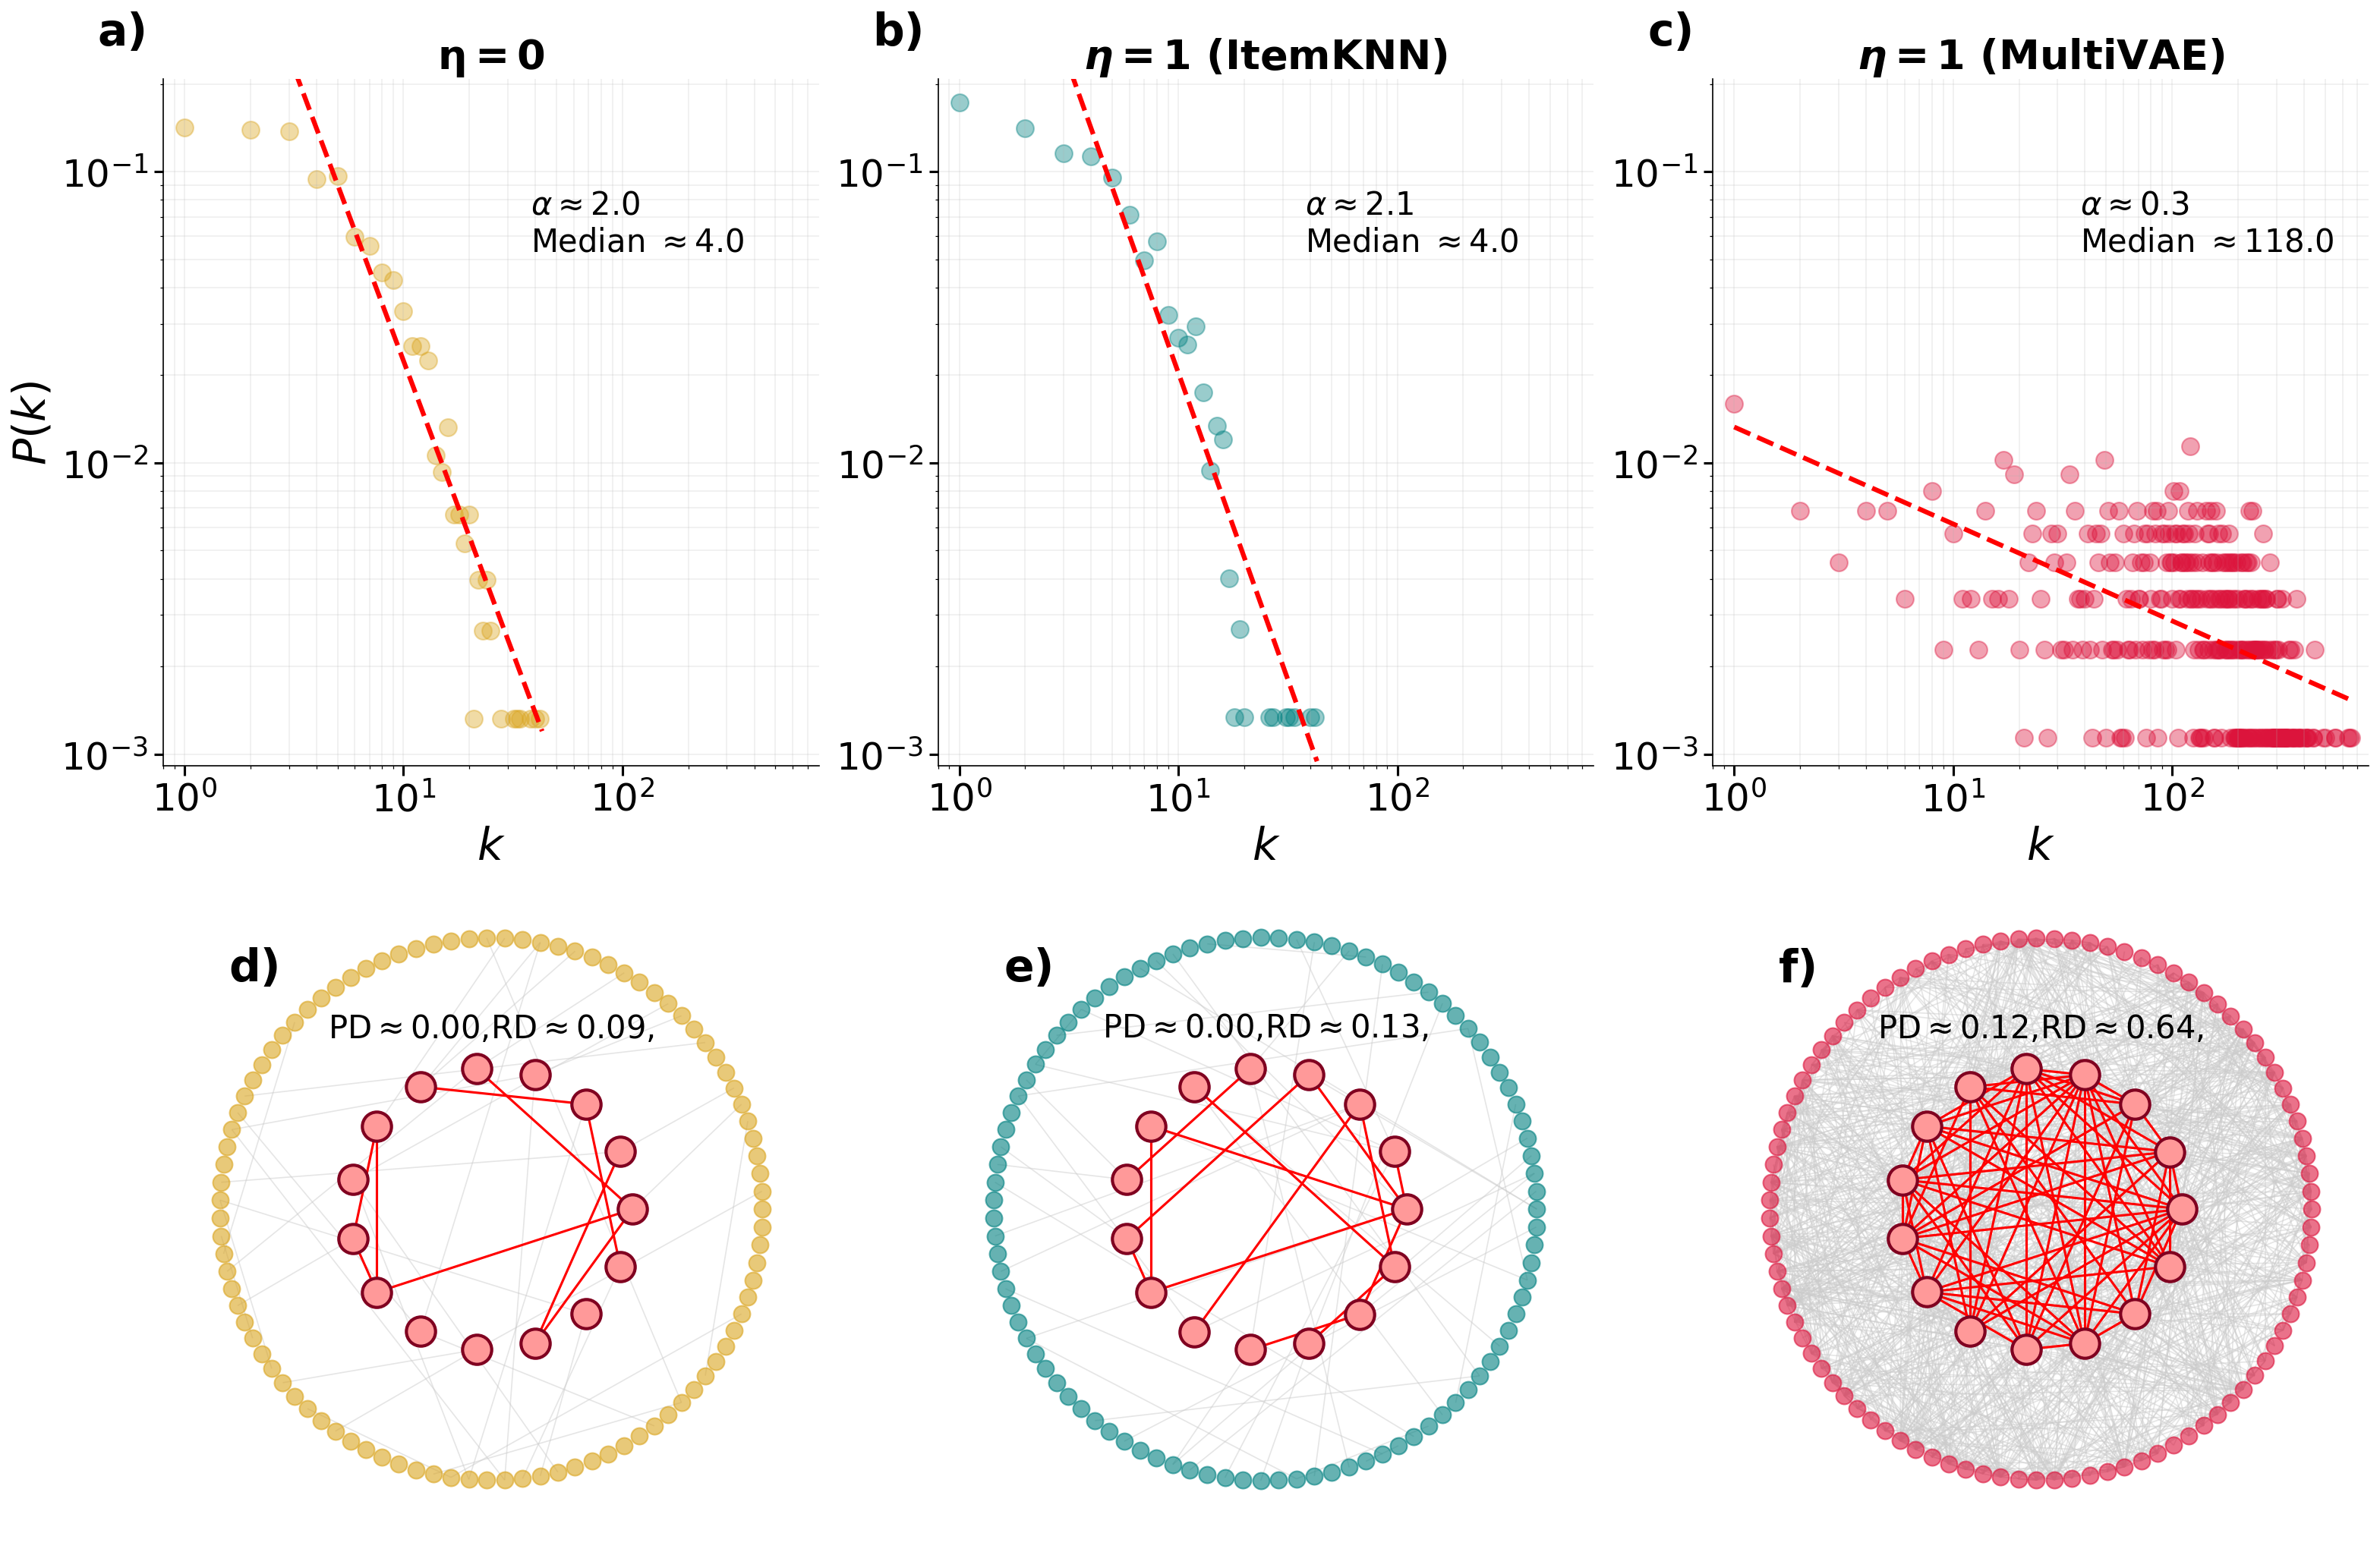

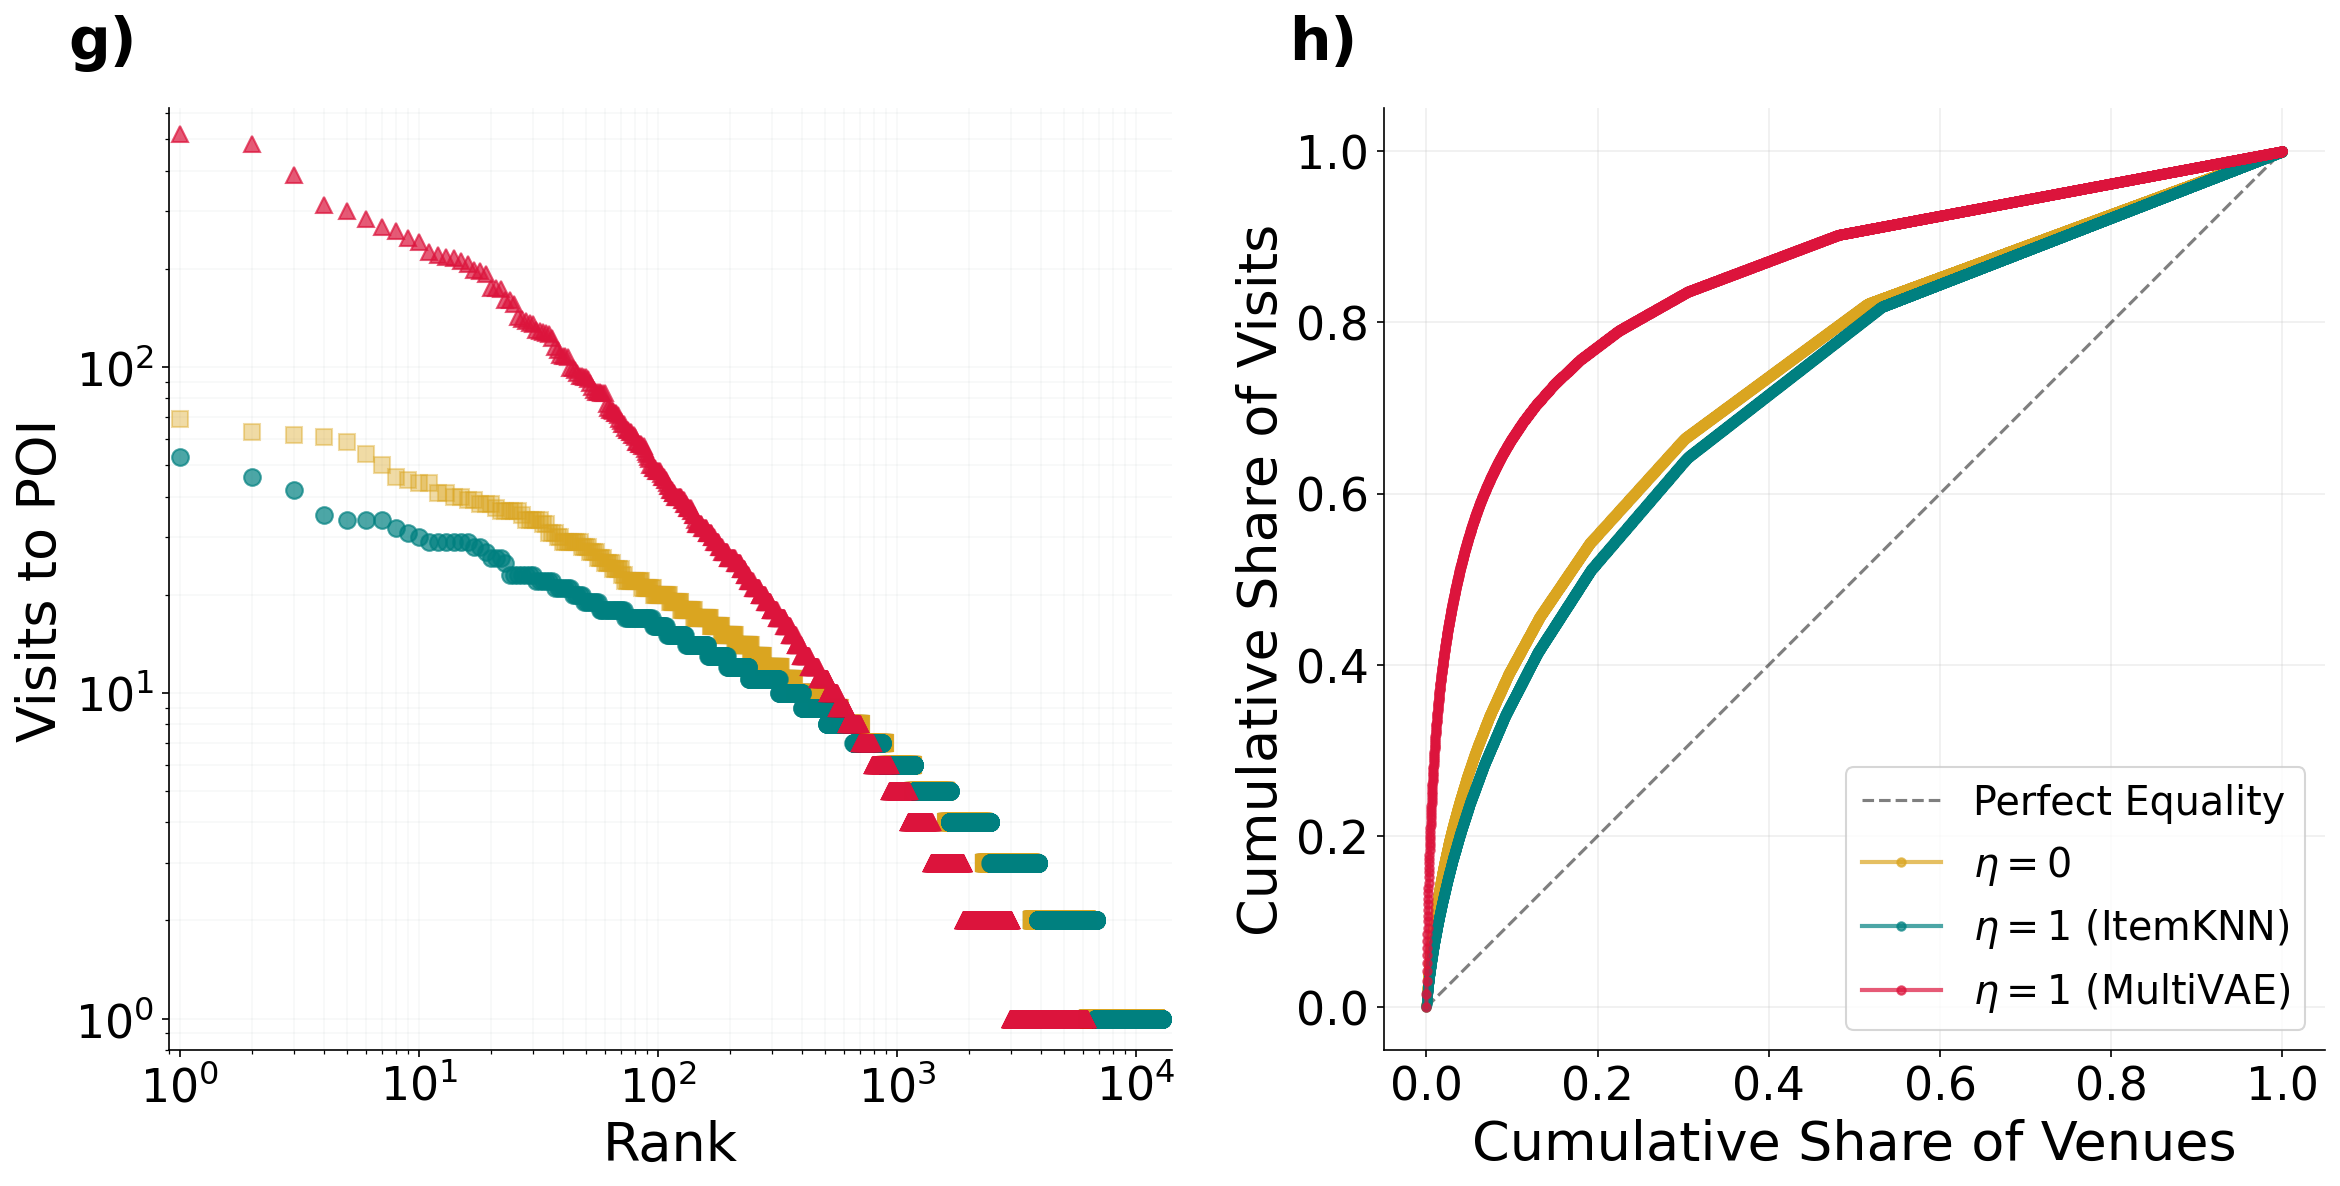

In [38]:
def create_split_plots_with_two_algos(agg_networks_dict_1, agg_networks_dict_2, all_distributions_1, all_distributions_2, 
                           algorithm1, algorithm2, trajectories_dict_1, trajectories_dict_2):
    """
    Creates two separate plots:
    
    Figure 1 (2x3 plot):
    - Row 1: Degree distributions for p=0, p=1 (algorithm1), p=1 (algorithm2)
    - Row 2: Network visualizations for p=0, p=1 (algorithm1), p=1 (algorithm2)
    
    Figure 2 (1x2 plot):
    - Rank plot and Lorenz curve plot, labeled as g) and h)
    
    Note: When p=0, the data is the same for both algorithms.
    """
    import matplotlib.pyplot as plt
    
    # ===== FIRST FIGURE (2x3): Degree distributions and Network visualizations =====
    fig1, axs1 = plt.subplots(2, 3, figsize=(21, 14), dpi=150)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Extract networks and ps values
    networks_1 = list(agg_networks_dict_1.values())
    ps_1 = list(agg_networks_dict_1.keys())
    networks_2 = list(agg_networks_dict_2.values())
    ps_2 = list(agg_networks_dict_2.keys())
    
    # --- Helper function for degree distribution plots ---
# --- Fixed helper function for degree distribution plots ---
    def plot_degree_distribution_subplot(all_distributions, ax, p_index, color, title=None, network=None):
        """
        Plots degree distribution on a subplot with proper median calculation.
        
        Parameters:
        - all_distributions: List of (x, y) tuples for degree distributions
        - ax: Matplotlib axis to plot on
        - p_index: Index in all_distributions to use
        - color: Color for the plot
        - title: Title for the subplot
        - network: The specific network to use for degree calculation
                (should be directly passed rather than inferred)
        """
        x, y = all_distributions[p_index]
        
        # Calculate global min/max for consistent axes
        all_dists_combined = all_distributions_1 + all_distributions_2
        global_y_min = min([min(y_val) for _, y_val in all_dists_combined if len(y_val) > 0])
        global_y_max = max([max(y_val) for _, y_val in all_dists_combined if len(y_val) > 0])
        global_x_min = min([min(x_val) for x_val, _ in all_dists_combined if len(x_val) > 0])
        global_x_max = max([max(x_val) for x_val, _ in all_dists_combined if len(x_val) > 0])
        
        ax.scatter(x, y, marker='o', alpha=0.4, s=120, c=color)
        if title:
            ax.set_title(title, fontsize=26, pad=7, fontweight='bold')
        
        ax.set_xlabel("$k$", size=28)
        if ax == axs1[0, 0]:
            ax.set_ylabel("$P(k)$", size=28)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.tick_params(width=1.5, length=6)
        
        log_x = np.log10(np.array(x) + 1)
        log_y = np.log10(np.array(y) + 1e-10)
        
        mask = np.isfinite(log_x) & np.isfinite(log_y)
        if np.sum(mask) >= 3:
            z = np.polyfit(log_x[mask], log_y[mask], 1)
            p_fit = np.poly1d(z)
            x_fit = np.logspace(np.log10(min(x)), np.log10(max(x) + 1), 100)
            y_fit = 10**p_fit(np.log10(x_fit))
            ax.plot(x_fit, y_fit, 'r--', linewidth=3)
            
            gamma = -z[0]
            
            # Use the explicitly passed network instead of inferring it
            if network is not None:
                # Calculate median degree from the actual network
                degrees = np.array([d[1] for d in network.degree()])
                median_degree = np.median(degrees)
                ax.text(0.56, 0.75, f"$\\alpha \\approx {gamma:.1f}$\nMedian $\\approx {median_degree:.1f}$",
                        transform=ax.transAxes, size=20)
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(global_y_min * 0.8, global_y_max * 1.2)
        ax.set_xlim(global_x_min * 0.8, global_x_max * 1.2)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(global_y_min * 0.8, global_y_max * 1.2)
        ax.set_xlim(global_x_min * 0.8, global_x_max * 1.2)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # --- ROW 1: Degree Distribution Plots ---
    # Plot 1: p=0 (same for both algorithms)
    plot_degree_distribution_subplot(all_distributions_1, axs1[0, 0], 0, "goldenrod", 
                                    title=r'$\mathbf{\eta=0}$',
                                    network=networks_1[0])
    
    # Plot 2: p=1 for algorithm1 - using network from first algorithm
    plot_degree_distribution_subplot(all_distributions_1, axs1[0, 1], 1, "teal", 
                                    title=f'$\\boldsymbol{{\\eta = 1}}$ ({algorithm1})',
                                    network=networks_1[1])
    
    # Plot 3: p=1 for algorithm2 - using network from second algorithm
    plot_degree_distribution_subplot(all_distributions_2, axs1[0, 2], 1, "crimson", 
                                    title=f'$\\boldsymbol{{\\eta = 1}}$ ({algorithm2})',
                                    network=networks_2[1])
    
    # --- ROW 2: Network Visualizations ---
    # Sample common nodes across all networks
    def sample_common_nodes(agg_networks_dict_1, agg_networks_dict_2, n_samples=110):
        """Sample nodes that are common across all networks from both algorithms"""
        all_networks = [list(agg_networks_dict_1.values())[0], list(agg_networks_dict_1.values())[1], 
                       list(agg_networks_dict_2.values())[1]]
        
        random.seed(511)
        np.random.seed(511)
        # Find common nodes across all networks
        common_nodes = set(all_networks[0].nodes())
        for G in all_networks[1:]:
            common_nodes = common_nodes.intersection(set(G.nodes()))
        
        # If we have enough common nodes, sample them
        if len(common_nodes) >= n_samples:
            return list(sorted(list(common_nodes)))[:n_samples]
        else:
            # If not enough common nodes, take all common nodes
            return sorted(list(common_nodes))
    
    common_nodes = sample_common_nodes(agg_networks_dict_1, agg_networks_dict_2, n_samples=110)
    print("Common nodes:", sorted(common_nodes))
    
    # Plot the networks
    plot_networks({0: networks_1[0]}, ax=axs1[1, 0], node_color="goldenrod", sample_size=110, 
                 rich_count=15, common_nodes=common_nodes, squared=True)
    
    plot_networks({1: networks_1[1]}, ax=axs1[1, 1], node_color="teal", sample_size=110, 
                 rich_count=15, common_nodes=common_nodes, squared=True)
    
    plot_networks({1: networks_2[1]}, ax=axs1[1, 2], node_color="crimson", sample_size=110, 
                 rich_count=15, common_nodes=common_nodes, squared=True)
    
    # Set the y-limits of the network plots to be equal
    ymin = min(ax.get_ylim()[0] for ax in axs1[1, :])
    ymax = max(ax.get_ylim()[1] for ax in axs1[1, :])
    for ax in axs1[1, :]:
        ax.set_ylim(ymin, ymax)
    
    # Add subplot labels (a-f)
    letters = ['a', 'b', 'c', 'd', 'e', 'f']
    letter_idx = 0
    for row in range(2):
        for col in range(3):
            ax = axs1[row, col]
            if row == 0:
                ax.text(-0.1, 1.1, f"{letters[letter_idx]})", transform=ax.transAxes, 
                    fontsize=28, fontweight='bold', va='top', ha='left', color='black')
            elif row == 1:
                ax.text(0.1, 0.9, f"{letters[letter_idx]})", transform=ax.transAxes,
                    fontsize=28, fontweight='bold', va='top', ha='left', color='black')
            letter_idx += 1
    
    plt.tight_layout()

    plt.savefig(f"{algorithm1}_vs_{algorithm2}_plot1.pdf", bbox_inches='tight', dpi=300)
    
    # ===== SECOND FIGURE (1x2): Rank Plot and Lorenz Curve =====
    fig2, axs2 = plt.subplots(1, 2, figsize=(16, 8), dpi=150)
    plt.subplots_adjust(wspace=0.3)
    
    colors = ["goldenrod", "teal", "crimson"]
    labels = [r'$\eta = 0$', f'$\eta = 1$ ({algorithm1})', f'$\eta = 1$ ({algorithm2})']
    
    # Get sorted visits for all three conditions
    sorted_visits_p0 = trajectories_dict_1[0][algorithm1].groupby('venueID').size().sort_values(ascending=False)
    sorted_visits_p1_algo1 = trajectories_dict_1[1][algorithm1].groupby('venueID').size().sort_values(ascending=False)
    sorted_visits_p1_algo2 = trajectories_dict_2[1][algorithm2].groupby('venueID').size().sort_values(ascending=False)
    
    # Compute ranks
    ranks_p0 = np.arange(1, len(sorted_visits_p0) + 1)
    ranks_p1_algo1 = np.arange(1, len(sorted_visits_p1_algo1) + 1)
    ranks_p1_algo2 = np.arange(1, len(sorted_visits_p1_algo2) + 1)
    
    # Find global min/max for consistent axis scaling
    y_min = min(sorted_visits_p0.min(), sorted_visits_p1_algo1.min(), sorted_visits_p1_algo2.min())
    y_max = max(sorted_visits_p0.max(), sorted_visits_p1_algo1.max(), sorted_visits_p1_algo2.max())
    x_max = max(len(sorted_visits_p0), len(sorted_visits_p1_algo1), len(sorted_visits_p1_algo2))
    
    y_min = 0.8 * y_min
    y_max = 1.2 * y_max
    
    # Power Law Plot (Rank Plot)
    ax = axs2[0]
    ax.loglog(ranks_p0, sorted_visits_p0.values, 
             marker="s", color=colors[0], markersize=8, alpha=0.4, linewidth=0,
             label=labels[0])
    
    ax.loglog(ranks_p1_algo1, sorted_visits_p1_algo1.values, 
             marker="o", color=colors[1], markersize=8, alpha=0.7, linewidth=0,
             label=labels[1])
    
    ax.loglog(ranks_p1_algo2, sorted_visits_p1_algo2.values, 
             marker="^", color=colors[2], markersize=8, alpha=0.7, linewidth=0,
             label=labels[2])
    
    ax.set_xlim(0.9, x_max * 1.1)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, which="both", ls="-", alpha=0.05, color='#6c757d')
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_xlabel('Rank', fontsize=26)
    ax.set_ylabel('Visits to POI', fontsize=26)
    #ax.legend(fontsize=18, framealpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Lorenz Curve Plot
    ax = axs2[1]
    # Calculate Lorenz curves for each condition
    def calculate_lorenz_curve(sorted_values):
        """
        Calculate Lorenz curve from values that are already sorted in descending order.
        Returns x and y coordinates for plotting.
        
        Parameters:
        -----------
        sorted_values : pandas.Series
            Values already sorted in descending order (most popular first)
        
        Returns:
        --------
        tuple : (x_points, y_points)
            Arrays for plotting the Lorenz curve
        """
        # Calculate cumulative sum and normalize
        cum_values = np.cumsum(sorted_values.values)
        cum_pct = cum_values / cum_values[-1]
        
        # X-axis points (population percentiles)
        points = np.linspace(0, 1, len(sorted_values))
        
        # Add origin point
        points = np.insert(points, 0, 0)
        cum_pct = np.insert(cum_pct, 0, 0)
        
        return points, cum_pct
    
    # Calculate and plot Lorenz curves
    perfect_equality = np.linspace(0, 1, 100)
    ax.plot(perfect_equality, perfect_equality, 'k--', label='Perfect Equality', alpha=0.5)
    
    for i, (sorted_visits, color, label) in enumerate([
        (sorted_visits_p0, colors[0], labels[0]),
        (sorted_visits_p1_algo1, colors[1], labels[1]),
        (sorted_visits_p1_algo2, colors[2], labels[2])
    ]):
        x, y = calculate_lorenz_curve(sorted_visits)
        ax.plot(x, y, color=color, marker='o', markersize=4, alpha=0.7, linewidth=2, label=label)
        
        # Calculate Gini coefficient
        # Gini = 1 - 2 * area under Lorenz curve
        # Area approximated using trapezoidal rule
        # area = np.trapz(y, x)
        # gini = 1 - 2 * area
        # ax.text(0.05, 0.95 - i*0.07, f'{label}: Gini = {gini:.3f}', 
        #         transform=ax.transAxes, fontsize=16, color=color)
    
    ax.set_xlabel('Cumulative Share of Venues', fontsize=26)
    ax.set_ylabel('Cumulative Share of Visits', fontsize=26)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.legend(fontsize=19, framealpha=0.8, loc='lower right')
    ax.set_aspect('equal')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add subplot labels (g-h)
    letters = ['g', 'h']
    for i, ax in enumerate(axs2):
        ax.text(-0.1, 1.1, f"{letters[i]})", transform=ax.transAxes, 
            fontsize=28, fontweight='bold', va='top', ha='left', color='black')
    
    plt.tight_layout()
    plt.savefig(f"{algorithm1}_vs_{algorithm2}_plot2.pdf", bbox_inches='tight', dpi=300)
    
    plt.show()
    
    
# Example usage:
create_split_plots_with_two_algos(
   agg_networks_dict_1, agg_networks_dict_2, 
   all_distributions_1, all_distributions_2,
   algorithm1, algorithm2, 
   trajectories_dict_1, trajectories_dict_2
)